In [ ]:
! pip install tensorflow

In [ ]:
! pip install keras numpy matplotlib mnist

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn 

In [73]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [74]:
xtrain.shape

(60000, 28, 28)

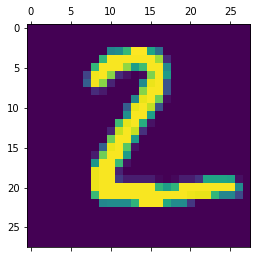

In [75]:
plt.matshow(xtest[1])

In [76]:
#Normalization
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtest[1]

In [78]:
xtrain = xtrain.reshape(-1,784)
xtest=xtest.reshape(-1,784)

In [79]:
xtest[1].shape

(784,)

In [80]:
#Bulding Sequential Model
model = keras.Sequential()
model.add(Dense(64, activation='relu',input_dim=784))  #Input layer
model.add(Dense(64,activation='relu'))  #Hidden layer
model.add(Dense(10,activation='softmax'))  #Output layer

In [81]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [82]:
model.fit(xtrain,
          to_categorical(ytrain),
          epochs=10,
          batch_size=32,
          )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2718 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0692 - accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0416 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0351 - accuracy: 0.9885
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9899
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.029

In [83]:
model.evaluate(xtest,to_categorical(ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9736


[0.10214445739984512, 0.9735999703407288]

In [84]:
pred = model.predict(xtest)

In [85]:
np.argmax(pred[1])

2

Text(69.0, 0.5, 'Actual output')

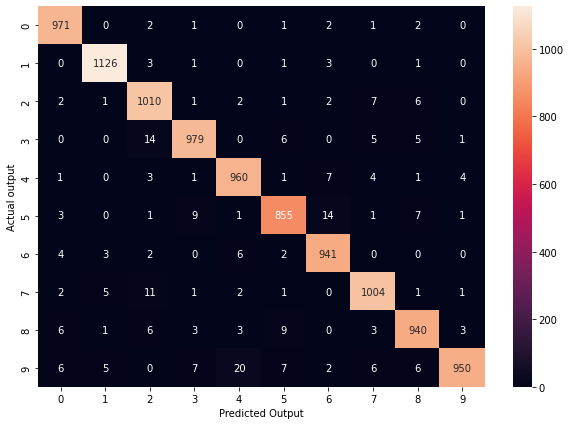

In [86]:
# Confusin matrics
y_pred= model.predict(xtest)
ypred=[np.argmax(i) for i in y_pred]
conf_metrx = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(conf_metrx,annot=True,fmt='d')
plt.xlabel('Predicted Output')
plt.ylabel('Actual output')
